In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/logistic regression dataset-Social_Network_Ads.csv')

In [3]:
print(df.shape)
df.head()

(400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

<Axes: xlabel='Purchased', ylabel='Age'>

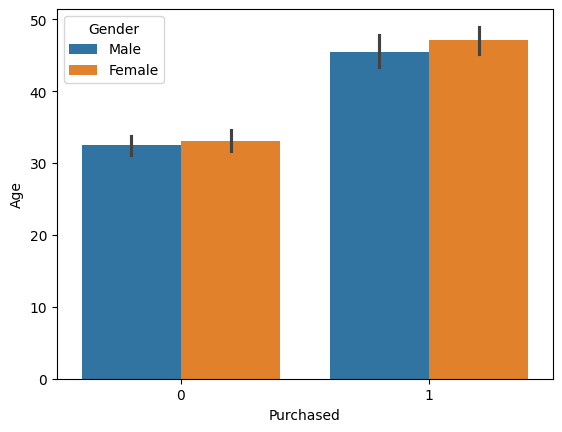

In [5]:
sns.barplot(x='Purchased', y='Age', data=df,hue='Gender')

<Axes: xlabel='Purchased', ylabel='EstimatedSalary'>

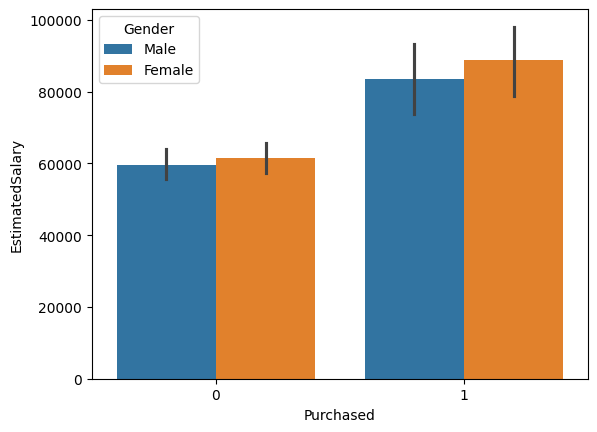

In [6]:
sns.barplot(x='Purchased', y='EstimatedSalary', data=df,hue='Gender')

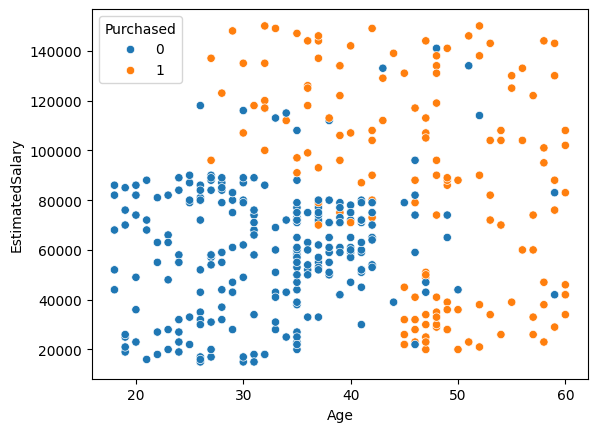

In [7]:
# Create the scatter plot
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df)

# Show the plot
plt.show()

In [8]:
# Separate the majority and minority classes
df_majority = df[df['Purchased'] == 0]
df_minority = df[df['Purchased'] == 1]

# Downsample majority class
df_majority_downsampled = df_majority.sample(n=143, random_state=123)

# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the dataset to mix the classes
df_balanced = df_balanced.sample(frac=1, random_state=123).reset_index(drop=True)

# Display the new class counts
print(df_balanced['Purchased'].value_counts())

Purchased
1    143
0    143
Name: count, dtype: int64


In [9]:
df_balanced.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15639576,Female,47,107000,1
1,15800061,Female,28,55000,0
2,15749381,Female,58,23000,1
3,15571059,Female,33,41000,0
4,15613014,Female,52,38000,1


In [10]:
X =df_balanced.iloc[:,2:4]
X.head()

,Age,EstimatedSalary
0,47,107000
1,28,55000
2,58,23000
3,33,41000
4,52,38000


In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [17]:
y = df_balanced.iloc[:,-1]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Purchased, dtype: int64

In [18]:
from sklearn.linear_model import Perceptron
p = Perceptron()

In [19]:
p.fit(X,y)

Perceptron()

In [20]:
y_pred = p.predict(X)
y_pred

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])

In [21]:
p.coef_

array([[1.97222354, 0.30735663]])

In [22]:
p.intercept_

array([-1.])

In [23]:
from mlxtend.plotting import plot_decision_regions

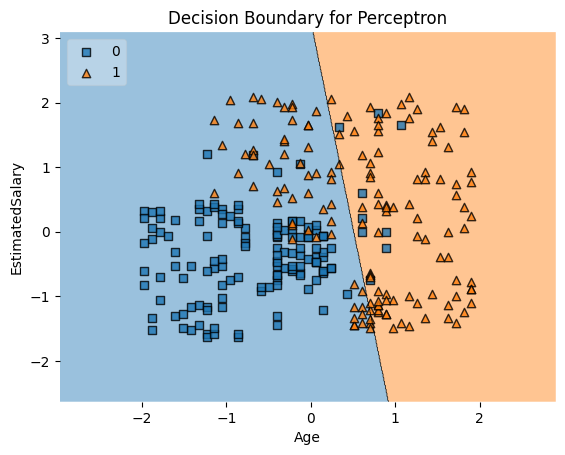

In [27]:
plot_decision_regions(X, y.values, clf=p, legend=2)
# Show plot
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.title('Decision Boundary for Perceptron')
plt.show()